In [1]:
# Install imbalanced-learn if needed
!pip install -q imbalanced-learn

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib  # For saving model


In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Check for null values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [4]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Check class distribution
print("After SMOTE:", np.bincount(y_train_res))


After SMOTE: [   0 1728 1728 1728 1728 1728 1728 1728]


In [14]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_res, y_train_res)

# Predictions
y_pred = model.predict(X_test_scaled)


In [15]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8657407407407407

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       432
           2       0.80      0.66      0.72       432
           3       0.86      0.82      0.84       432
           4       0.94      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.84      0.90      0.87       432
           7       0.94      0.97      0.95       432

    accuracy                           0.87      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.87      0.86      3024


Confusion Matrix:
 [[335  61   1   0   9   1  25]
 [ 81 285  11   0  33  18   4]
 [  0   1 355  22   8  46   0]
 [  0   0   4 424   0   4   0]
 [  1   6   8   0 411   6   0]
 [  0   4  33   5   1 389   0]
 [ 13   0   0   0   0   0 419]]


In [21]:
# Save model and scaler
joblib.dump(model, "forest_cover_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

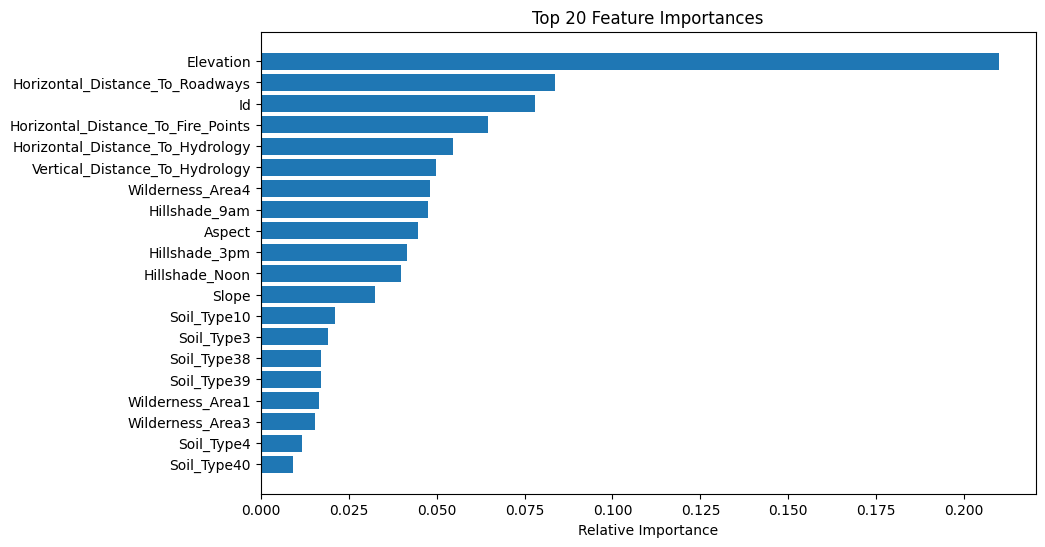

In [22]:
# Plot top 20 important features
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [23]:
joblib.dump(model, 'forest_cover_model.pkl', compress=1)


['forest_cover_model.pkl']